## Project Stage - IV (Basic Machine Learning)  ddl: 04/28/2023

## Goals

The goal of Stage IV is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.


### Tasks for Stage IV:

#### Task 1: (70 pts)
- Team: (30)
    - Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US. 
        - Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.
        - Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.
        - Plot trend line along for the data along with the forecast of 1 week ahead. 
        - Describe the trends as compared to other countries. 
- Member: (40 pts)
    - Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from the first day of infections. 
        - X-Axis - number of days since the first case, Y - Axis number of new cases and deaths. Calcluate error using RMSE.
        - Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends.
        - Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
        - Perform hypothesis tests on questions identified in Stage II
            - e.x. *Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.*. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
        - Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing. 

    
#### Task 2: (30 pts)
- Member:
    - For each of the aforemention analysis plot graphs,
        - trend line
        - confidence intervals (error in prediction)
        - prediction path (forecast)

**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Canvas. Do not submit to Github, at least before the submission deadline, to avoid potential plagiarism.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#from mlxtend.evaluate import bias_variance_decomp
from math import sqrt
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [10]:
confirmed_cases = pd.read_csv('data/covid_confirmed_usafacts.csv')
confirmed_cases

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19205,19205,19205,19205,19205,19318,19318,19318,19318,19318
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68182,68182,68182,68182,68182,68518,68518,68518,68518,68518
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7120,7120,7120,7120,7120,7188,7188,7188,7188,7188
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7808,7808,7808,7808,7808,7855,7855,7855,7855,7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12394,12394,12430,12430,12430,12437,12437,12437,12437,12437
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,11997,11997,12035,12035,12035,12045,12045,12045,12045,12045
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,6303,6303,6318,6318,6318,6333,6333,6333,6333,6333
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,2717,2717,2727,2727,2727,2731,2731,2731,2731,2731


In [11]:
confirmed_deaths = pd.read_csv('data/covid_deaths_usafacts.csv')
confirmed_deaths

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,719,721,721,721,721,721
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,136
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47


In [12]:
def question1(confirmed_cases):
    group_cases_USA = confirmed_cases.sum()
    group_cases_USA = group_cases_USA.iloc[4:]

    temp = group_cases_USA.index

    X =[]
    for i in range(len(temp)):
        X.append(i)
    Y= group_cases_USA.values
    X = np.array(X)
    X= X.reshape(-1,1)
    Y = Y.astype('int')

    X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X, Y, test_size=.3)

    lrg = LogisticRegression()
    lrl = LinearRegression()
    lrg.fit(X_train_cases,y_train_cases)
    lrl.fit(X_train_cases,y_train_cases)
    
    pr = LinearRegression()
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(X_train_cases)
    X_poly_test = poly.transform(X_test_cases)
    pr.fit(X_poly_train, y_train_cases)

    y_pred_lrl = lrl.predict(X_test_cases)
    y_pred_lrg = lrg.predict(X_test_cases)
    y_pred_pr = pr.predict(X_poly_test)

    rmse_lrl = sqrt(abs(mean_squared_error(y_test_cases, np.abs(y_pred_lrl))))
    rmse_lrg = sqrt(abs(mean_squared_error(y_test_cases, (y_pred_lrg))))
    rmse_pr = sqrt(abs(mean_squared_error(y_test_cases, y_pred_pr)))

    print(f'Logistic regression Root Mean Square Error (RMSE): {round(rmse_lrg,2)}')
    print(f'Linear regression Root Mean Square Error (RMSE): {round(rmse_lrl,2)}')
    print(f'Polynomial regression Root Mean Square Error (RMSE): {round(rmse_pr,2)}')
    
    diff_pred_act = y_test_cases - y_pred_lrg
    sum_diff = sum(diff_pred_act)
    bias = sum_diff/len(y_test_cases)
    print(f'Bias logistic regression model: {round(bias,2)}')
    
    pred_var = y_pred_lrg.var()
    print(f'Variance logistic regression model: {round(pred_var)}')
    
    plt.figure(figsize=(20,15))
    plt.title('Cases along with trend line')
    plt.plot(X,
        lrg.predict(X),
        color='b',
        label = 'Prediction')

    plt.scatter(X,Y,facecolor="none",
        edgecolor='m',
        s=10,
           label = 'Actual')
    plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True,
    )
    plt.show()
    
    
    
    next_week = []
    for i in range(7):
        next_week.append(i + len(X))
    next_week = np.array(next_week)
    next_week= next_week.reshape(-1,1)

    y_next_week = lrg.predict(next_week)
    X_next = np.append(X, next_week)
    X_next = X_next.reshape(-1,1)
    
    plt.figure(figsize=(20,15))
    plt.title('Cases along with trend line and forecast of 1 week ahead')
    plt.plot(X_next,
            lrg.predict(X_next),
            color='b',
            label = 'Prediction')

    plt.scatter(X,Y,facecolor="none",
            edgecolor='m',
            s=10,
               label = 'Actual')
    
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )
    plt.show()
    
    

Logistic regression Root Mean Square Error (RMSE): 3667.23
Linear regression Root Mean Square Error (RMSE): 6211465.68
Polynomial regression Root Mean Square Error (RMSE): 4109566.41
Bias logistic regression model: 3287618.24
Variance logistic regression model: 1174096998220848


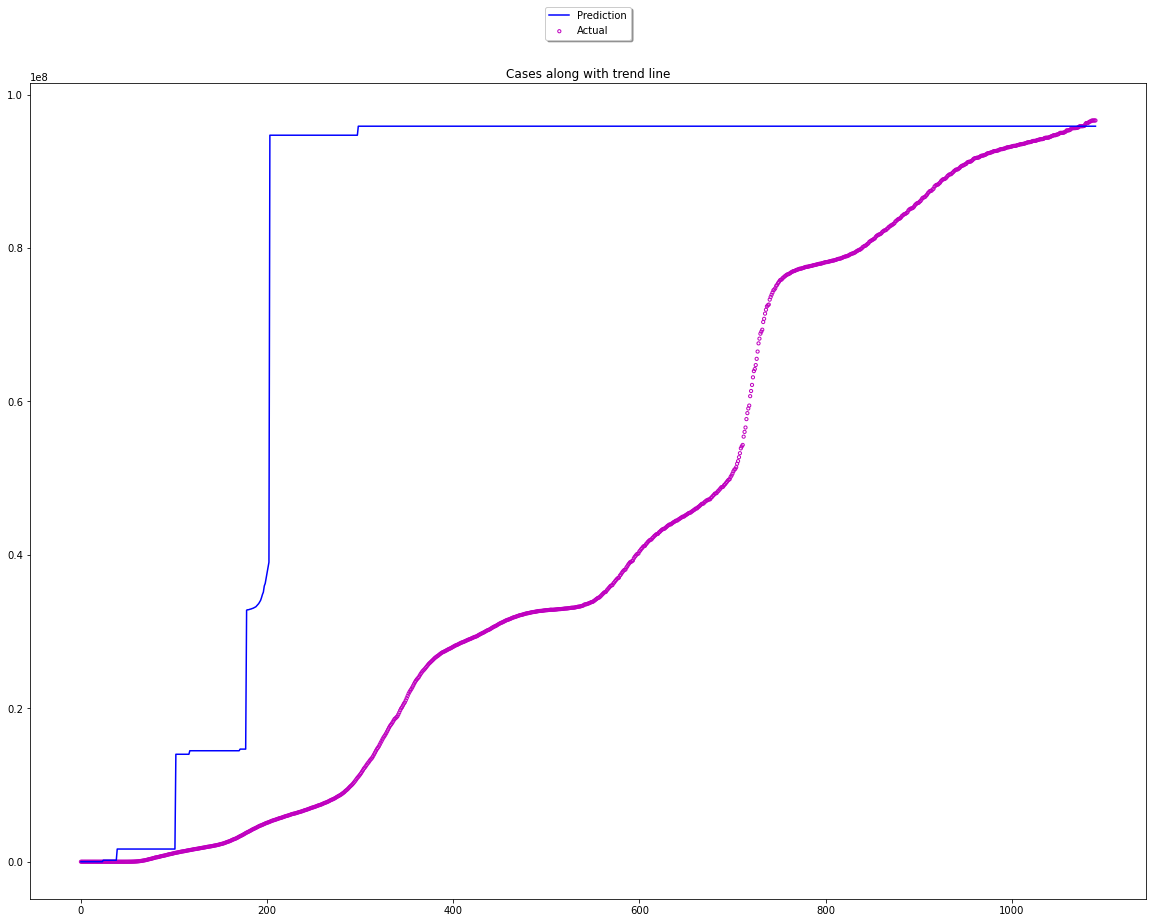

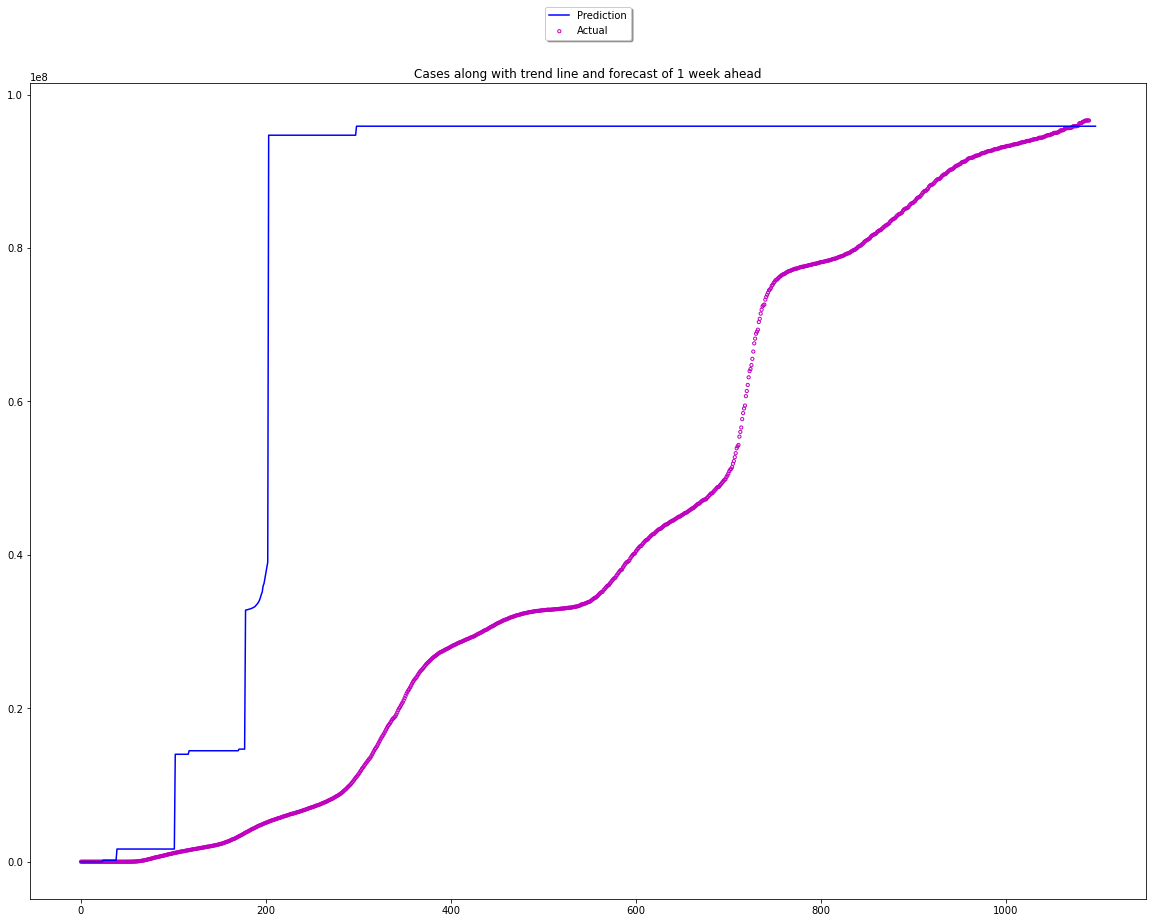

In [13]:
question1(confirmed_cases)

RMSE of both logistic regression and linear regression model decreases as the size of the training set increases, and it decreases the most for the logistic regression.

We can see that the calculated bias is very low, in comparison to the high variance. This means that our logistic regression model is underfitting and is not able to fully capture the pattern in our dataset.


### Predicting Deaths in USA

Logistic regression Root Mean Square Error (RMSE): 5015.92
Linear regression Root Mean Square Error (RMSE): 56925.3
Polynomial regression Root Mean Square Error (RMSE): 32536.31
Bias logistic regression model: -114569.23
Variance logistic regression model: 250078466146


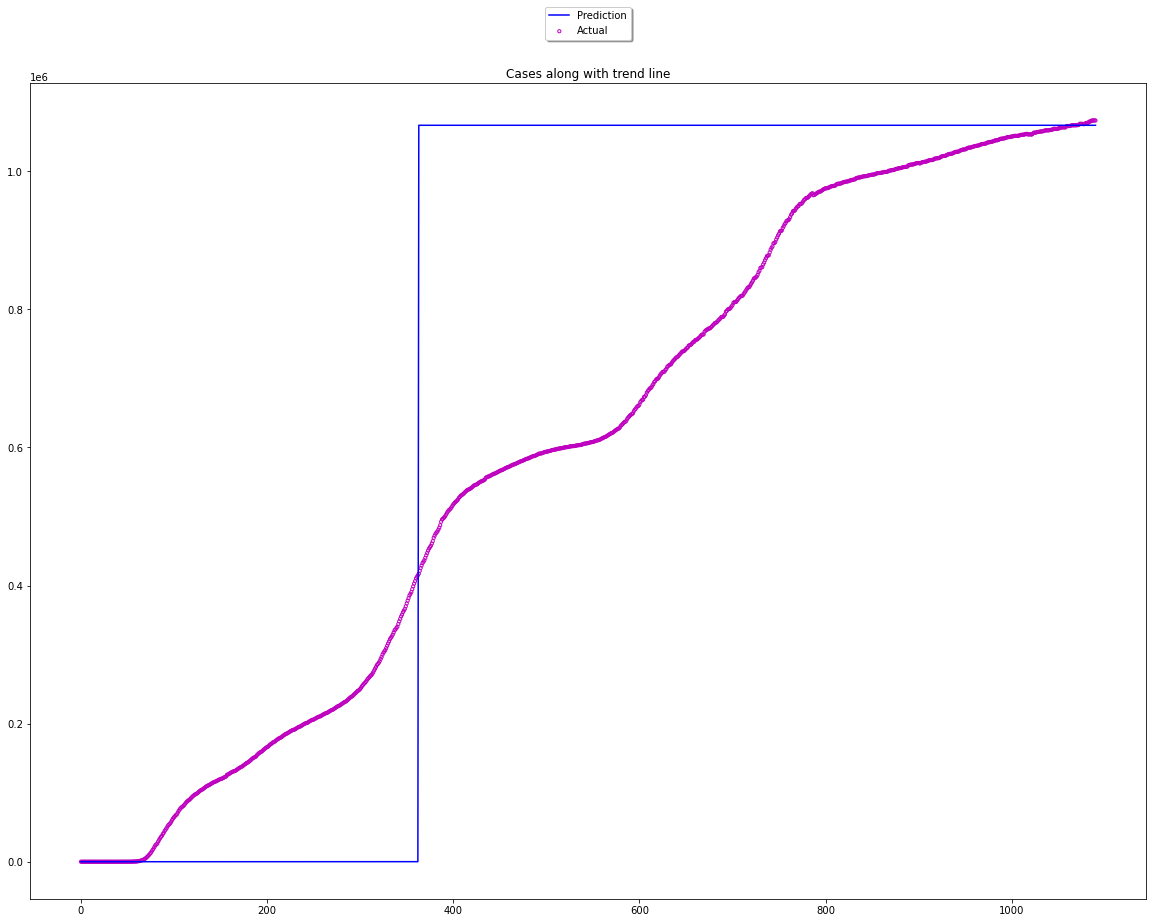

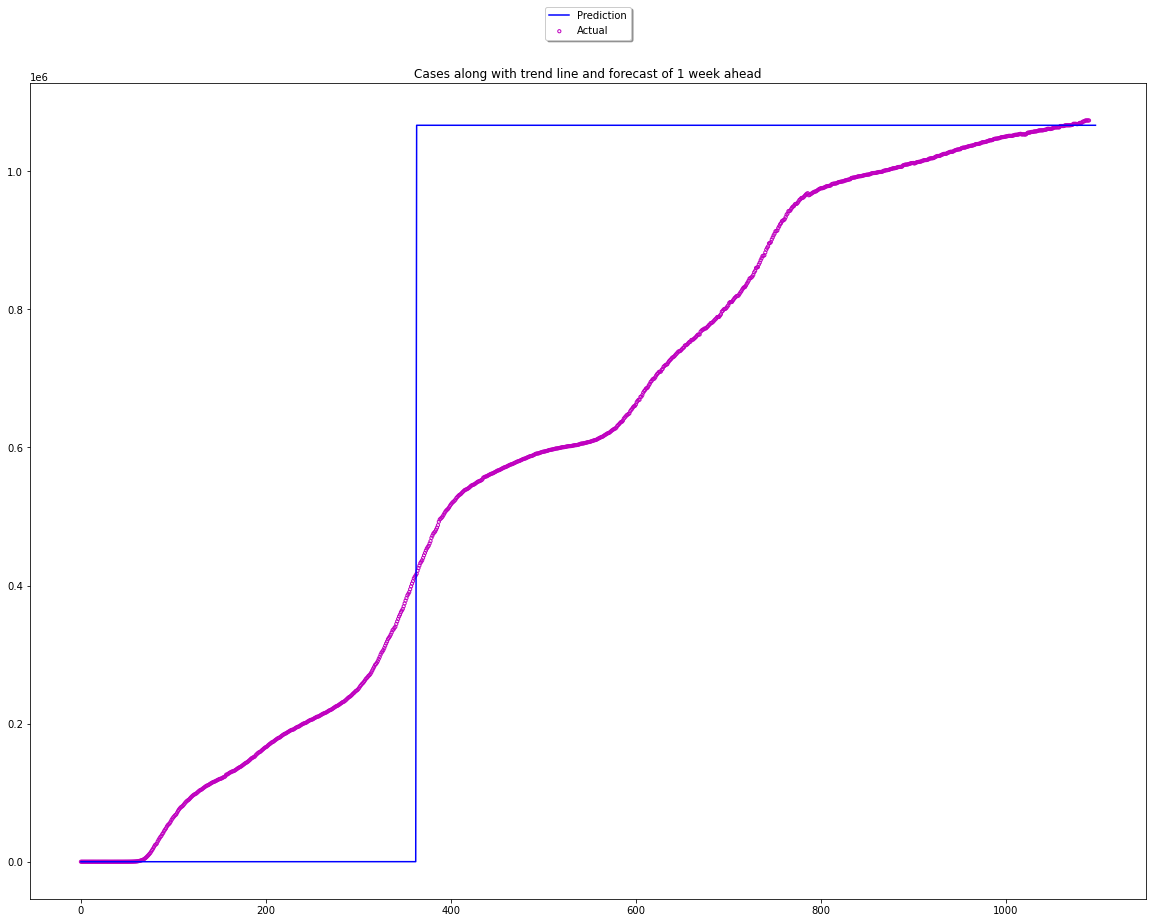

In [14]:
question1(confirmed_deaths)